**Theory questions**

1. Can we use Bagging for regression problems?
- Yes, Bagging can be applied to regression problems using base regressors like DecisionTreeRegressor. It reduces variance and improves prediction stability.

2. What is the difference between multiple model training and single model training?
- Multiple model training (ensemble) combines the predictions of several models for better accuracy and robustness, while single model training relies on one model, which may be prone to overfitting or bias.

3. Explain the concept of feature randomness in Random Forest.
- Random Forest introduces randomness by selecting a random subset of features for each split in a tree, which decorrelates trees and improves generalization.

4. What is OOB (Out-of-Bag) Score?
- OOB Score is an internal validation method in Bagging where each model is evaluated on samples not included in its bootstrap sample. It provides a performance estimate without using a separate test set.

5. How can you measure the importance of features in a Random Forest model?
- Feature importance is measured by how much each feature decreases impurity (e.g., Gini or entropy) across all trees, averaged and normalized.

6. Explain the working principle of a Bagging Classifier.
- A Bagging Classifier trains multiple instances of a base classifier on different bootstrap samples and aggregates their predictions (e.g., majority vote).

7. How do you evaluate a Bagging Classifier’s performance?
- You can use accuracy, precision, recall, F1-score, or ROC-AUC on a test set, or rely on OOB score for a built-in performance estimate.

8. How does a Bagging Regressor work?
- A Bagging Regressor builds multiple regressors on random subsets of data and averages their outputs to reduce variance and improve stability.

9. What is the main advantage of ensemble techniques?
- They increase prediction accuracy and robustness by combining multiple weak or strong learners, thus reducing overfitting and variance.

10. What is the main challenge of ensemble methods?
- They are computationally expensive, harder to interpret, and may not always outperform simpler models if data is small or clean.

11. Explain the key idea behind ensemble techniques.
- Ensemble methods combine the predictions of several models to produce a more accurate and stable prediction than any single model.

12. What is a Random Forest Classifier?
- It's an ensemble of decision trees trained on different subsets of data and features, where final predictions are made via majority vote.

13. What are the main types of ensemble techniques?
- The three main types are Bagging, Boosting, and Stacking—each with different mechanisms to combine multiple models.

14. What is ensemble learning in machine learning?
- It's a technique that combines multiple models to improve overall performance compared to individual models.

15. When should we avoid using ensemble methods?
- Avoid them when model interpretability is critical, data is limited, or computational resources are constrained.

16. How does Bagging help in reducing overfitting?
- Bagging reduces overfitting by averaging predictions from multiple models trained on varied data samples, lowering variance.

17. Why is Random Forest better than a single Decision Tree?
- It reduces overfitting and increases accuracy by combining multiple uncorrelated decision trees.

18. What is the role of bootstrap sampling in Bagging?
- Bootstrap sampling ensures each model in the ensemble sees a different subset of the data, promoting diversity and reducing variance.

19. What are some real-world applications of ensemble techniques?
- They're used in fraud detection, spam filtering, medical diagnosis, recommendation systems, and image recognition.

20. What is the difference between Bagging and Boosting?
- Bagging trains models independently in parallel to reduce variance; Boosting trains sequentially with focus on errors to reduce bias.



**Practical Questions**

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# Create Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


Bagging Classifier Accuracy: 1.0000


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define Bagging Regressor with Decision Tree as base estimator
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                      n_estimators=50,
                                      random_state=42)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_regressor.predict(X_test)

# Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse:.4f}")


Bagging Regressor MSE: 0.2579


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_

# Display feature importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:\n")
print(feature_importance_df)


Feature Importance Scores:

                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          

24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Print results
print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")


Decision Tree MSE: 0.5280
Random Forest MSE: 0.2565


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf_model.fit(X, y)

# Print the Out-of-Bag score
print(f"OOB Score: {rf_model.oob_score_:.4f}")


OOB Score: 0.9613


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Bagging Classifier with SVM (SVC) as base estimator
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)

# Train the model
bagging_svm.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {accuracy:.4f}")


Bagging Classifier with SVM Accuracy: 1.0000


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of trees to compare
n_estimators_list = [1, 10, 50, 100, 200]

print("Random Forest Accuracy with Different Numbers of Trees:\n")

# Train and evaluate for each n_estimators
for n in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators = {n:>3} -> Accuracy: {acc:.4f}")


Random Forest Accuracy with Different Numbers of Trees:

n_estimators =   1 -> Accuracy: 0.9474
n_estimators =  10 -> Accuracy: 0.9649
n_estimators =  50 -> Accuracy: 0.9708
n_estimators = 100 -> Accuracy: 0.9708
n_estimators = 200 -> Accuracy: 0.9708


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Bagging Classifier with Logistic Regression as base estimator
bagging_model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=10,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = bagging_model.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"Bagging Classifier with Logistic Regression AUC Score: {auc_score:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier with Logistic Regression AUC Score: 0.9978


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


29. Train a Random Forest Regressor and analyze feature importance scores.

Feature Importance Scores:

      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


<ipython-input-11-2290755819>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


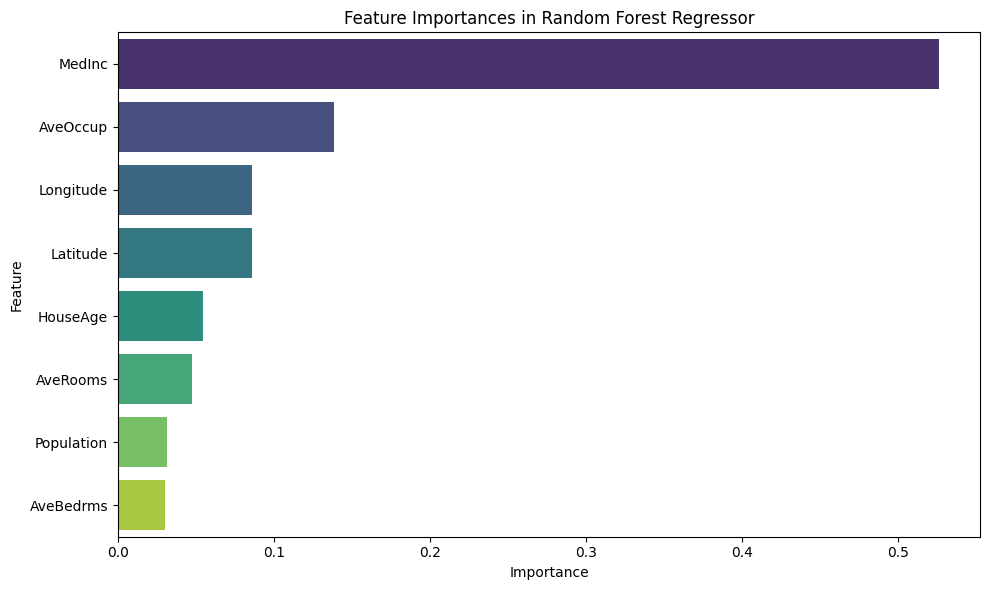

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:\n")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importances in Random Forest Regressor")
plt.tight_layout()
plt.show()


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier with Decision Tree base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

# Train Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Compare Accuracies
print(f"Bagging Classifier Accuracy:       {bagging_acc:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_acc:.4f}")


Bagging Classifier Accuracy:       0.9591
Random Forest Classifier Accuracy: 0.9708


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Results
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Test Accuracy: {accuracy:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Test Accuracy: 0.9649


32.  Train a Bagging Regressor with different numbers of base estimators and compare performance.

Bagging Regressor Performance (MSE):

n_estimators =   1 -> MSE: 0.5583
n_estimators =  10 -> MSE: 0.2862
n_estimators =  50 -> MSE: 0.2579
n_estimators = 100 -> MSE: 0.2568
n_estimators = 200 -> MSE: 0.2542


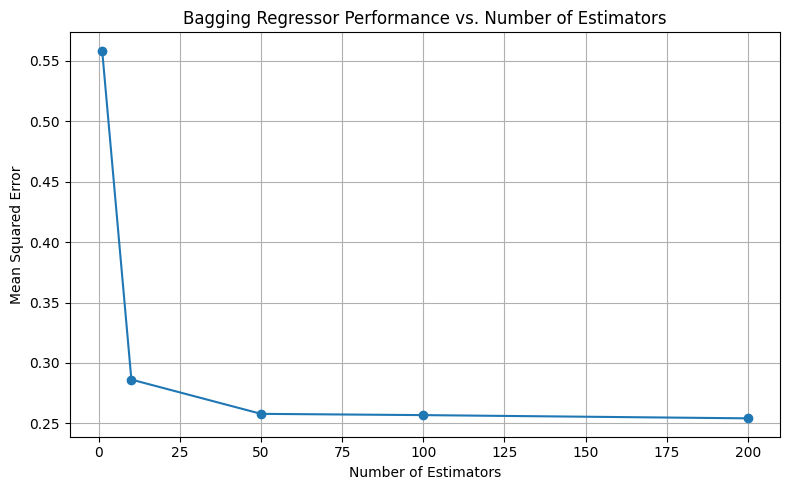

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of base estimator counts to test
n_estimators_list = [1, 10, 50, 100, 200]

mse_results = []

# Train and evaluate models
print("Bagging Regressor Performance (MSE):\n")
for n in n_estimators_list:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(f"n_estimators = {n:>3} -> MSE: {mse:.4f}")

# Plot performance
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_results, marker='o')
plt.title("Bagging Regressor Performance vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()


33. Train a Random Forest Classifier and analyze misclassified samples.

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Identify misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Create DataFrame with misclassified samples
misclassified_samples = pd.DataFrame(X_test[misclassified_indices], columns=feature_names)
misclassified_samples['True Label'] = [target_names[i] for i in y_test[misclassified_indices]]
misclassified_samples['Predicted Label'] = [target_names[i] for i in y_pred[misclassified_indices]]

print("\nMisclassified Samples:")
print(misclassified_samples.head())

# Optional: total number of misclassifications
print(f"\nTotal Misclassified Samples: {len(misclassified_samples)}")


Test Accuracy: 0.9708

Misclassified Samples:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   
4        15.13         29.81           96.71      719.5          0.08320   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069         0.1662   
2           0.12790         0.09789              0.05246         0.1908   
3           0.09947         0.12040              0.04938         0.2075   
4           0.04605         0.04686              0.02739         0.1852   

   mean fractal dimension  ...  worst perimete

34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train single Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

# Train Bagging Classifier with Decision Tree base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

# Compare performances
print(f"Single Decision Tree Accuracy: {tree_acc:.4f}")
print(f"Bagging Classifier Accuracy:   {bagging_acc:.4f}")


Single Decision Tree Accuracy: 0.9415
Bagging Classifier Accuracy:   0.9591


35. Train a Random Forest Classifier and visualize the confusion matrix.

Accuracy: 0.9708


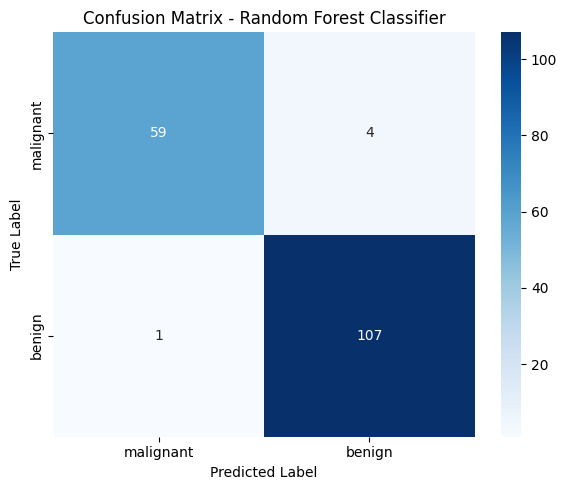

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
target_names = data.target_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base models
tree = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('dt', tree), ('svm', svm)],
    final_estimator=logreg,
    passthrough=True
)

# Train all models
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
logreg.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

# Predict and evaluate
tree_acc = accuracy_score(y_test, tree.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
stack_acc = accuracy_score(y_test, stack_model.predict(X_test))

# Print results
print(f"Decision Tree Accuracy:       {tree_acc:.4f}")
print(f"SVM Accuracy:                 {svm_acc:.4f}")
print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Accuracy:       0.9415
SVM Accuracy:                 0.9649
Logistic Regression Accuracy: 0.9708
Stacking Classifier Accuracy: 0.9766


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


37. Train a Random Forest Classifier and print the top 5 most important features.

In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and print top 5 features
top5 = importance_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Most Important Features:")
print(top5.to_string(index=False))


Top 5 Most Important Features:
             Feature  Importance
 mean concave points    0.141934
worst concave points    0.127136
          worst area    0.118217
      mean concavity    0.080557
        worst radius    0.077975


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Bagging Classifier
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", round(precision, 4))
print("Recall:   ", round(recall, 4))
print("F1-Score: ", round(f1, 4))

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 0.9633
Recall:    0.9722
F1-Score:  0.9677

Classification Report:

              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

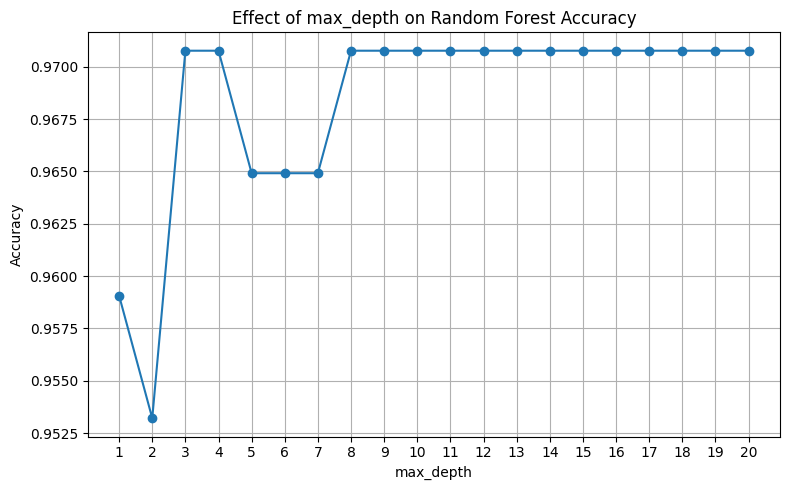

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different max_depth values
depths = list(range(1, 21))
accuracies = []

for depth in depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(depths)
plt.grid(True)
plt.tight_layout()
plt.show()


40.Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging Regressor with Decision Tree
bag_tree = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bag_tree.fit(X_train, y_train)
y_pred_tree = bag_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Bagging Regressor with K-Neighbors
bag_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=100, random_state=42)
bag_knn.fit(X_train, y_train)
y_pred_knn = bag_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print performance
print("Bagging with Decision Tree Regressor - MSE:", round(mse_tree, 4))
print("Bagging with K-Neighbors Regressor    - MSE:", round(mse_knn, 4))


Bagging with Decision Tree Regressor - MSE: 0.2568
Bagging with K-Neighbors Regressor    - MSE: 1.0998


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

ROC-AUC Score: 0.9968


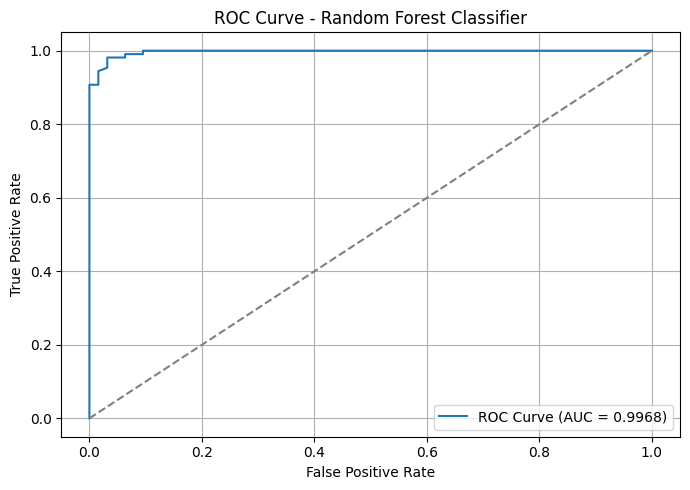

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", round(roc_auc, 4))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Create Bagging Classifier with Decision Tree as base estimator
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Evaluate using 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Display results
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Average Accuracy:       ", round(np.mean(cv_scores), 4))
print("Standard Deviation:     ", round(np.std(cv_scores), 4))


Cross-validation scores: [0.8947 0.9386 0.9912 0.9649 1.    ]
Average Accuracy:        0.9579
Standard Deviation:      0.0382


43.  Train a Random Forest Classifier and plot the Precision-Recall curve.

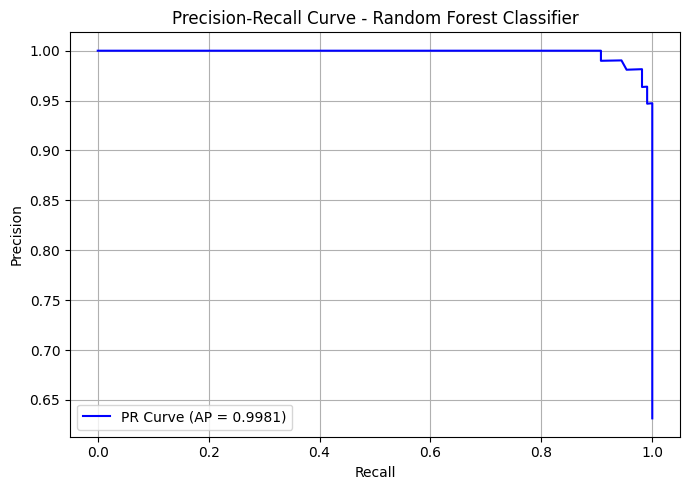

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.4f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Final estimator
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Create stacking classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=5)

# Train all models
for name, model in base_learners:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name.upper()} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Train stacking model
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
print(f"STACKING Model Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")


RF Accuracy: 0.9708


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.9708


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

STACKING Model Accuracy: 0.9708


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [27]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different max_samples values (fraction of training data used for each bootstrap sample)
sample_sizes = [0.3, 0.5, 0.7, 1.0]

# Train and evaluate models
print("Performance of Bagging Regressor with different bootstrap sample sizes (max_samples):\n")
for size in sample_sizes:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=size,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"max_samples = {size}: MSE = {mse:.4f}")


Performance of Bagging Regressor with different bootstrap sample sizes (max_samples):

max_samples = 0.3: MSE = 0.2767
max_samples = 0.5: MSE = 0.2626
max_samples = 0.7: MSE = 0.2585
max_samples = 1.0: MSE = 0.2568
